In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
import math

In [73]:
dp=pd.read_csv('C:\\Users\\MY PC\\OneDrive\\Desktop\\ML_Assignment_2\\adult.data')
dp

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [74]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

dp.columns = col_names
dp.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [75]:
dp.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [76]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [77]:
categorical = [var for var in dp.columns if dp[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [78]:
dp[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [79]:
dp[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

In [80]:
for freq in categorical:
    print(dp[freq].value_counts())
    print("\n")

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64


 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64


 Prof-specialty       4140
 Craft-repair         4099
 Exec-mana

In [81]:
for var in categorical:
    dp[var].replace(' ?', np.NaN, inplace=True)

In [82]:
for var in categorical:
    print(dp[var].value_counts())
    print("\n")

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64


 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64


 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-cleri

In [83]:
dp[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

In [84]:
numerical = [var for var in dp.columns if dp[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [85]:
dp[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


In [86]:
dp[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [87]:
X=dp.iloc[:,0:14]
Y=dp.iloc[:,14:15]
X_lgr=X
Y_lgr=Y
X_knn=X
Y_knn=Y

In [88]:
X.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States


In [89]:
Y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [90]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 77,shuffle = True)

In [91]:
cate_cols = [col for col in X_train.columns if X_train[col].dtypes == 'O']
cate_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [92]:
num_cols = [col for col in X_train.columns if X_train[col].dtypes != 'O']
num_cols

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [93]:
X_train[cate_cols].isnull().sum()

workclass         1231
education            0
marital_status       0
occupation        1236
relationship         0
race                 0
sex                  0
native_country     388
dtype: int64

In [94]:
for x in [X_train, X_test]:
    x['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    x['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    x['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)

In [95]:
X_train[cate_cols].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [96]:
X_test[cate_cols].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

[' <=50K' ' >50K']


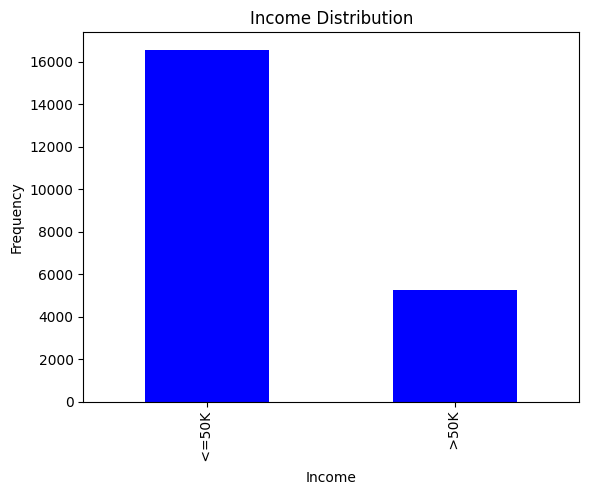

In [97]:
print(Y_train['income'].unique())
label = [' <=50K', ' >50K']

Y_train['income'].value_counts().plot(kind='bar', color='blue')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.xticks(range(2), label)
plt.show()

In [98]:
print(Y_train['income'].value_counts(normalize=True))

 <=50K    0.759248
 >50K     0.240752
Name: income, dtype: float64


In [99]:
def conditional_prob_numerical(X_train, Y_train, feature, label):
    n = X_train.shape[0]
    n_label = Y_train[Y_train['income'] == label].shape[0]
    X_temp = X_train[Y_train['income'] == label][feature]
    mean = X_temp.mean()
    std = X_temp.std()
    return (mean, std)

mean_std_ = {}
for label in [' <=50K', ' >50K']:
    for feature in num_cols:
        mean_std_[(feature, label)] = conditional_prob_numerical(X_train, Y_train, feature, label)

def conditional_prob_categorical(X_train, Y_train, feature, label):
    n = X_train.shape[0]
    n_label = Y_train[Y_train['income'] == label].shape[0]
    X_temp = X_train[Y_train['income'] == label][feature]
    return (X_temp.value_counts()/n_label)

prob_ = {}
for label in [' <=50K', ' >50K']:
    for feature in cate_cols:
        prob_[(feature, label)] = conditional_prob_categorical(X_train, Y_train, feature, label)

def predict(X_test):
    y_pred = []
    for i in range(X_test.shape[0]):
        p = {}
        for label in [' <=50K', ' >50K']:
            p[label] = 1
            for feature in num_cols:
                mean, std = mean_std_[(feature, label)]
                p[label] *= norm.pdf(X_test[feature].iloc[i], mean, std)
            for feature in cate_cols:
                if X_test[feature].iloc[i] in prob_[(feature, label)].index:
                    p[label] *= prob_[(feature, label)][X_test[feature].iloc[i]]
                else:
                    p[label] *= 1
        y_pred.append(max(p, key=p.get))
    return y_pred

y_pred = predict(X_test)
# print(y_pred)

def accuracy(y_pred, Y_test):
    return (sum(y_pred == Y_test['income'])/len(Y_test))*100

print("Accuracy of the model is: ", accuracy(y_pred, Y_test))

def recall(y_pred, Y_test):
    tp = 0
    fn = 0
    for i in range(len(y_pred)):
        if y_pred[i] == ' >50K' and Y_test['income'].iloc[i] == ' >50K':
            tp += 1
        if y_pred[i] == ' <=50K' and Y_test['income'].iloc[i] == ' >50K':
            fn += 1
    return (tp/(tp+fn))*100

print("Recall of the model is: ", recall(y_pred, Y_test))

def precision(y_pred, Y_test):
    tp = 0
    fp = 0
    for i in range(len(y_pred)):
        if y_pred[i] == ' >50K' and Y_test['income'].iloc[i] == ' >50K':
            tp += 1
        if y_pred[i] == ' >50K' and Y_test['income'].iloc[i] == ' <=50K':
            fp += 1
    return (tp/(tp+fp))*100

print("Precision of the model is: ", precision(y_pred, Y_test))

def f1_score(y_pred, Y_test):
    return 2*((precision(y_pred, Y_test)*recall(y_pred, Y_test))/(precision(y_pred, Y_test)+recall(y_pred, Y_test)))

print("F1 Score of the model is: ", f1_score(y_pred, Y_test))

Accuracy of the model is:  83.72266170311772
Recall of the model is:  59.48242564696794
Precision of the model is:  68.75
F1 Score of the model is:  63.78132118451025


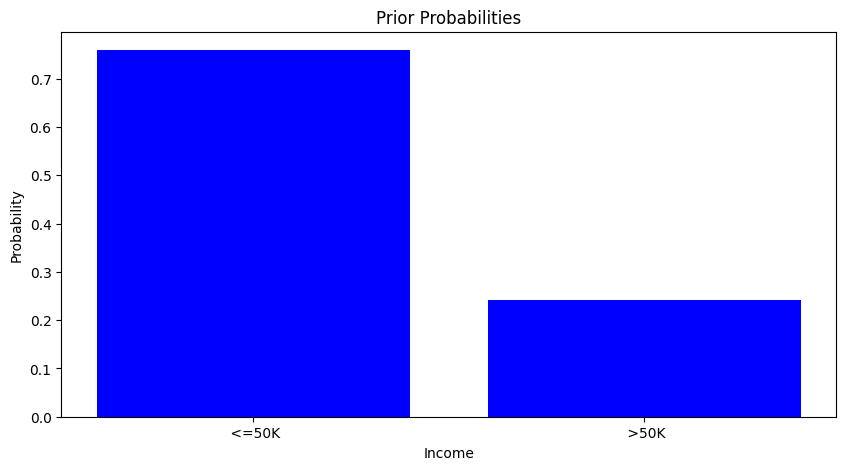

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'age'),
  Text(1, 0, 'fnlwgt'),
  Text(2, 0, 'education-num'),
  Text(3, 0, 'capital-gain'),
  Text(4, 0, 'capital-loss'),
  Text(5, 0, 'hours-per-week')])

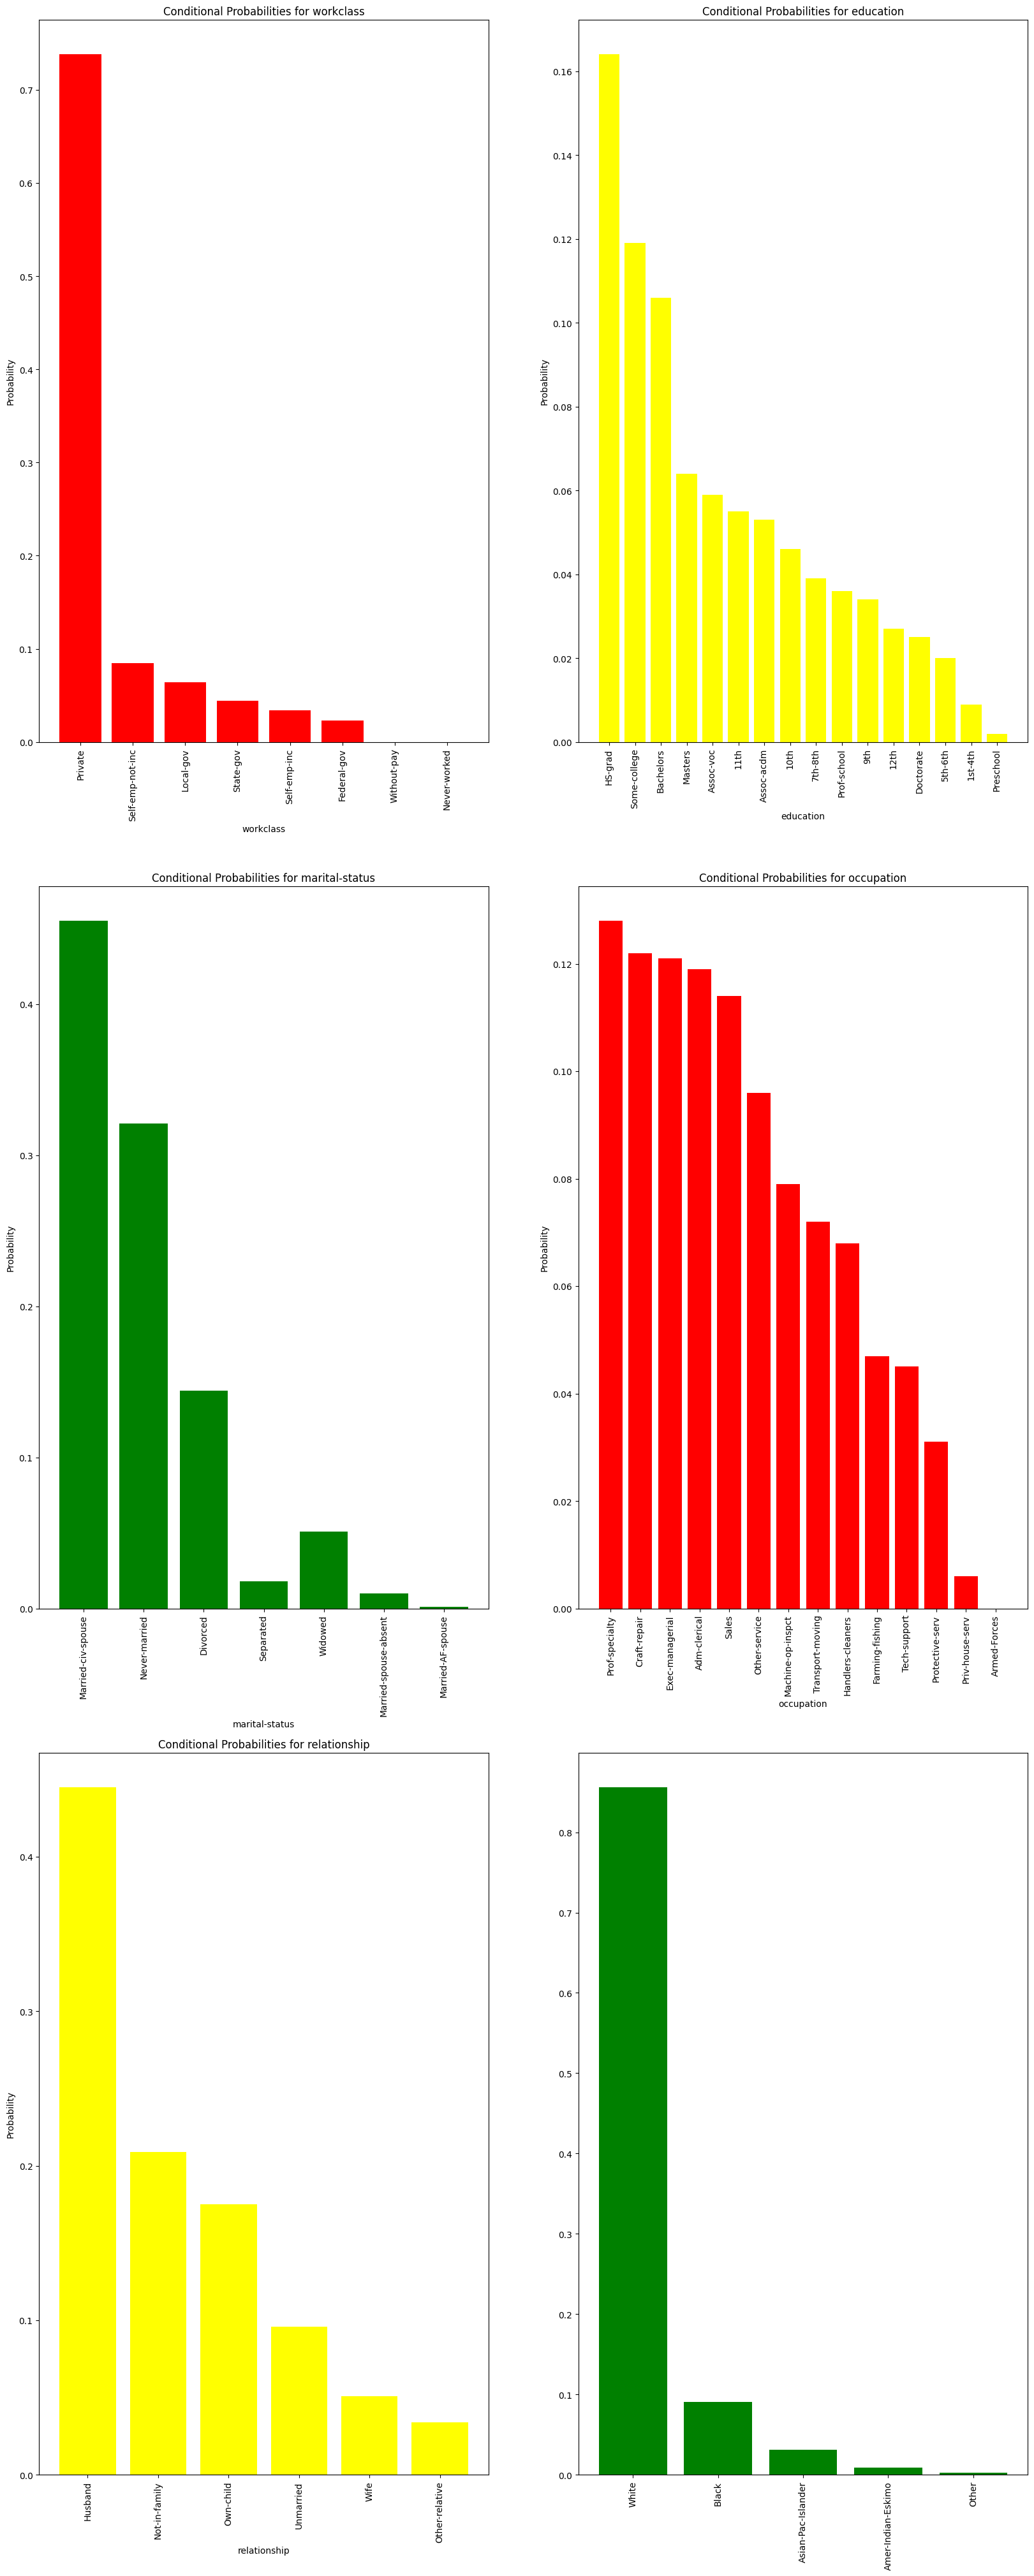

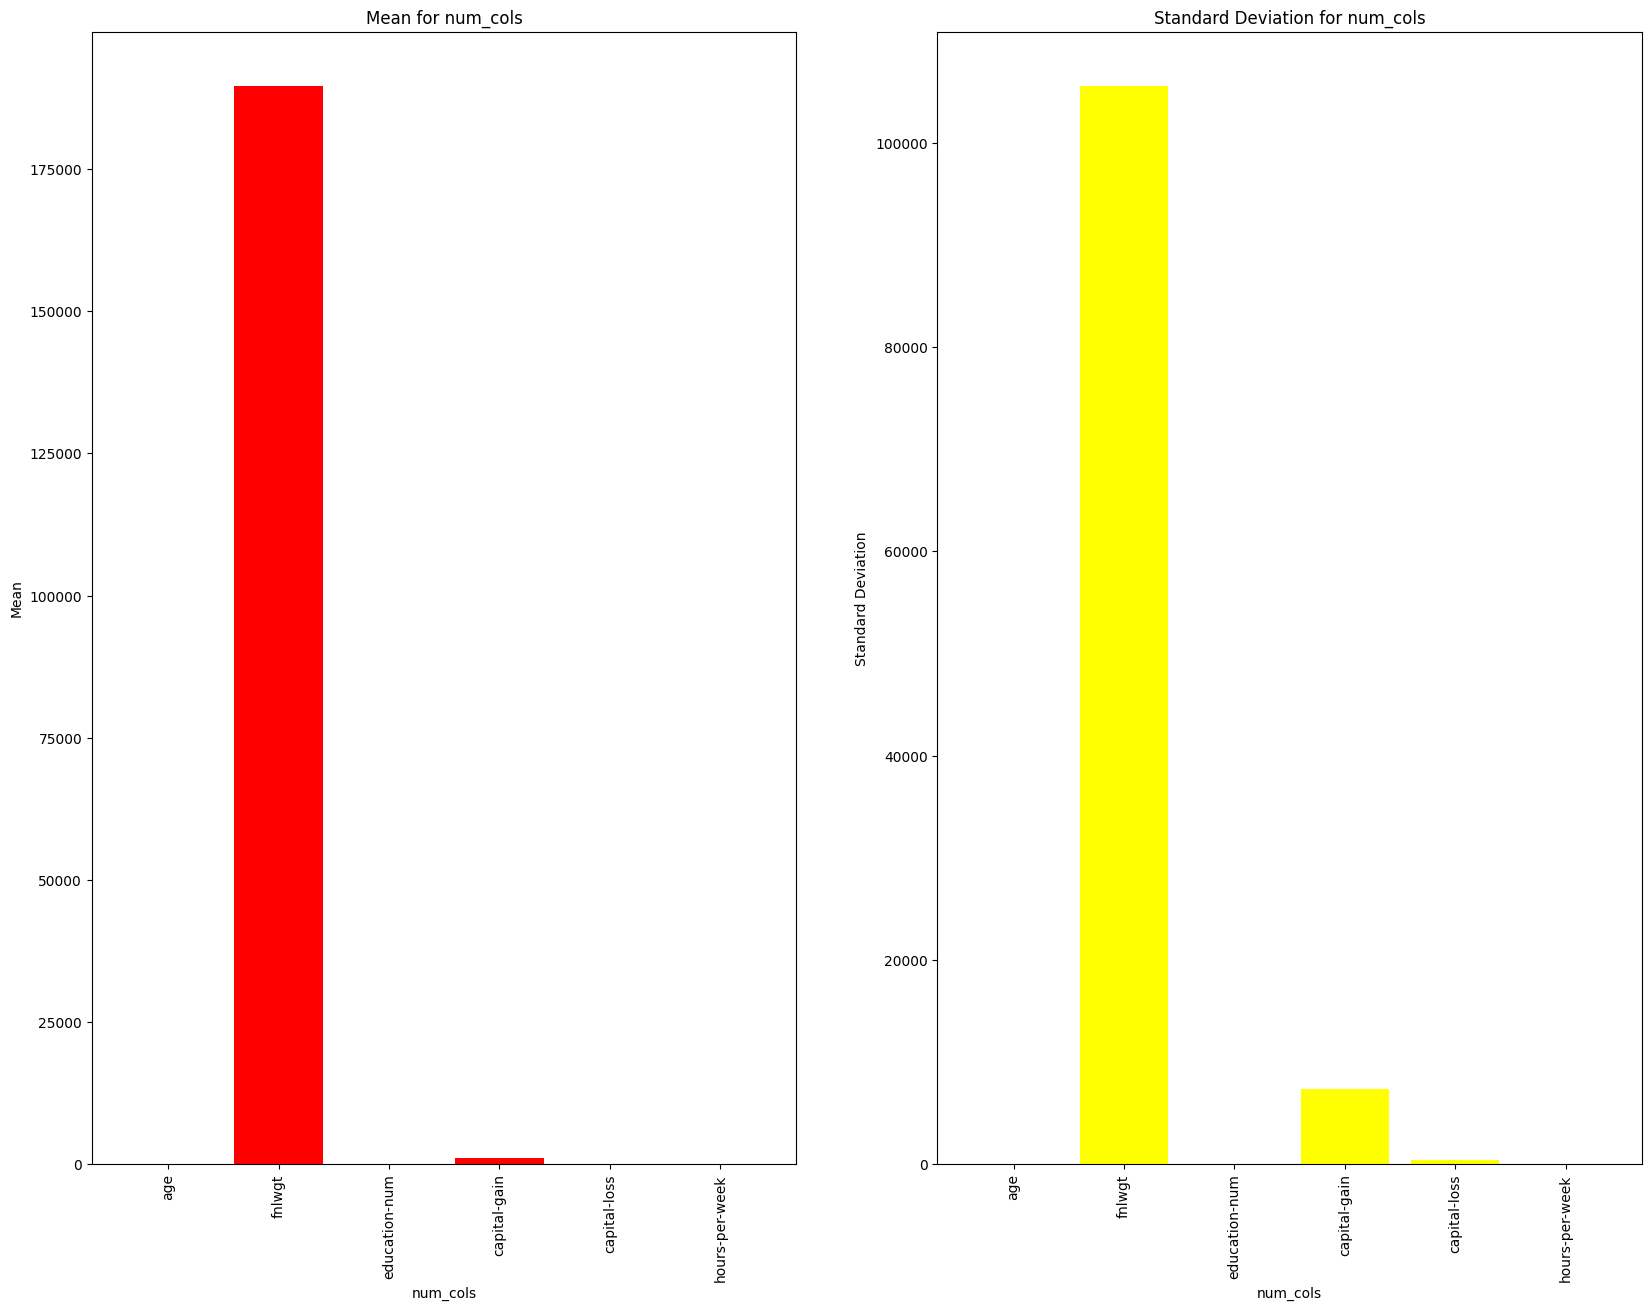

In [100]:
# plot prior probabilities
plt.figure(figsize=(10, 5))
plt.bar([' <=50K', ' >50K'], [0.75919, 0.24081], color='blue')
plt.title('Prior Probabilities')
plt.xlabel('Income')
plt.ylabel('Probability')
plt.show()

plt.figure(figsize=(20, 50))
plt.subplot(3, 2, 1)
plt.bar(['Private', 'Self-emp-not-inc', 'Local-gov', 'State-gov', 'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked'], [0.738, 0.085, 0.064, 0.044, 0.034, 0.023, 0.000, 0.000], color='red')
plt.title('Conditional Probabilities for workclass')
plt.xlabel('workclass')
plt.ylabel('Probability')
plt.xticks(rotation=90)
plt.subplot(3, 2, 2)
plt.bar(['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc', '11th', 'Assoc-acdm', '10th', '7th-8th', 'Prof-school', '9th', '12th', 'Doctorate', '5th-6th', '1st-4th', 'Preschool'], [0.164, 0.119, 0.106, 0.064, 0.059, 0.055, 0.053, 0.046, 0.039, 0.036, 0.034, 0.027, 0.025, 0.020, 0.009, 0.002], color='yellow')
plt.title('Conditional Probabilities for education')
plt.xlabel('education')
plt.ylabel('Probability')
plt.xticks(rotation=90)
plt.subplot(3, 2, 3)
plt.bar(['Married-civ-spouse', 'Never-married', 'Divorced', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'], [0.455, 0.321, 0.144, 0.018, 0.051, 0.010, 0.001], color='green')
plt.title('Conditional Probabilities for marital-status')
plt.xlabel('marital-status')
plt.ylabel('Probability')
plt.xticks(rotation=90)
plt.subplot(3, 2, 4)
plt.bar(['Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical', 'Sales', 'Other-service', 'Machine-op-inspct', 'Transport-moving', 'Handlers-cleaners', 'Farming-fishing', 'Tech-support', 'Protective-serv', 'Priv-house-serv', 'Armed-Forces'], [0.128, 0.122, 0.121, 0.119, 0.114, 0.096, 0.079, 0.072, 0.068, 0.047, 0.045, 0.031, 0.006, 0.000], color='red')
plt.title('Conditional Probabilities for occupation')
plt.xlabel('occupation')
plt.ylabel('Probability')
plt.xticks(rotation=90)
plt.subplot(3, 2, 5)
plt.bar(['Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife', 'Other-relative'], [0.445, 0.209, 0.175, 0.096, 0.051, 0.034], color='yellow')
plt.title('Conditional Probabilities for relationship')
plt.xlabel('relationship')
plt.ylabel('Probability')
plt.xticks(rotation=90)
plt.subplot(3, 2, 6)
plt.bar(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'], [0.856, 0.091, 0.031, 0.009, 0.003], color='green')
plt.xticks(rotation=90)


# plot mean and standard deviation for num_cols
plt.figure(figsize=(20, 50))
plt.subplot(3, 2, 1)
plt.bar(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'], [38.5816, 189664.134, 10.0807, 1077.6488, 87.3038, 40.4375], color='red')
plt.title('Mean for num_cols')
plt.xlabel('num_cols')
plt.ylabel('Mean')
plt.xticks(rotation=90)
plt.subplot(3, 2, 2)
plt.bar(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'], [13.6404, 105604.025, 2.5727, 7385.2921, 402.9605, 12.3474], color='yellow')
plt.title('Standard Deviation for num_cols')
plt.xlabel('num_cols')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=90)



In [101]:
def conditional_prob_categorical_ll(X_train, Y_train, feature, label):
    n = X_train.shape[0]
    n_label = Y_train[Y_train['income'] == label].shape[0]
    X_temp = X_train[Y_train['income'] == label][feature]
    return ((X_temp.value_counts()+1)/n_label+X_temp.unique().shape[0])

prob_ll = {}
for label in [' <=50K', ' >50K']:
    for feature in cate_cols:
        prob_ll[(feature, label)] = conditional_prob_categorical_ll(X_train, Y_train, feature, label)


def conditional_prob_numerical_ll(X_train, Y_train, feature, label):
    n = X_train.shape[0]
    n_label = Y_train[Y_train['income'] == label].shape[0]
    X_temp = X_train[Y_train['income'] == label][feature]
    mean = X_temp.mean()
    std = X_temp.std()
    return (mean, std)

mean_std_ll = {}
for label in [' <=50K', ' >50K']:
    for feature in num_cols:
        mean_std_ll[(feature, label)] = conditional_prob_numerical_ll(X_train, Y_train, feature, label)

def predict_ll(X_test):
    y_pred = []
    for i in range(X_test.shape[0]):
        p = {}
        for label in [' <=50K', ' >50K']:
            p[label] = 1
            for feature in num_cols:
                mean, std = mean_std_ll[(feature, label)]
                p[label] *= norm.pdf(X_test[feature].iloc[i], mean, std)
            for feature in cate_cols:
                if X_test[feature].iloc[i] in prob_ll[(feature, label)].index:
                    p[label] *= prob_ll[(feature, label)][X_test[feature].iloc[i]]
                else:
                    p[label] *= 1
        y_pred.append(max(p, key=p.get))
    return y_pred

y_pred = predict_ll(X_test)
# print(y_pred)

def accuracy_ll(y_pred, Y_test):
    return (sum(y_pred == Y_test['income'])/len(Y_test))*100

print("Accuracy of the model is: ", accuracy_ll(y_pred, Y_test))

def recall_ll(y_pred, Y_test):
    tp = 0
    fn = 0
    for i in range(len(y_pred)):
        if y_pred[i] == ' >50K' and Y_test['income'].iloc[i] == ' >50K':
            tp += 1
        if y_pred[i] == ' <=50K' and Y_test['income'].iloc[i] == ' >50K':
            fn += 1
    return (tp/(tp+fn))*100

print("Recall of the model is: ", recall_ll(y_pred, Y_test))

def precision_ll(y_pred, Y_test):
    tp = 0
    fp = 0
    for i in range(len(y_pred)):
        if y_pred[i] == ' >50K' and Y_test['income'].iloc[i] == ' >50K':
            tp += 1
        if y_pred[i] == ' >50K' and Y_test['income'].iloc[i] == ' <=50K':
            fp += 1
    return (tp/(tp+fp))*100

print("Precision of the model is: ", precision_ll(y_pred, Y_test))

def f1_score_ll(y_pred, Y_test):
    return 2*((precision_ll(y_pred, Y_test)*recall_ll(y_pred, Y_test))/(precision_ll(y_pred, Y_test)+recall_ll(y_pred, Y_test)))

print("F1 Score of the model is: ", f1_score_ll(y_pred, Y_test))




Accuracy of the model is:  79.53466728711028
Recall of the model is:  31.093086133642334
Precision of the model is:  65.98360655737704
F1 Score of the model is:  42.26831189288527


In [102]:
X_lgr = pd.get_dummies(X_lgr, columns=cate_cols)

In [103]:
X_train_lgr, X_test_lgr, Y_train_lgr, Y_test_lgr = train_test_split(X_lgr, Y_lgr, test_size=0.2, random_state=42)


In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

logreg = LogisticRegression()
logreg.fit(X_train_lgr, Y_train_lgr)
y_pred_lgr = logreg.predict(X_test_lgr)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_lgr, Y_test_lgr)*100))
print("Precision of the model is: ", precision_score(Y_test_lgr, y_pred_lgr, average='weighted')*100)
print("Recall of the model is: ", recall_score(Y_test_lgr, y_pred_lgr, average='weighted')*100)
print("F1 Score of the model is: ", f1_score(Y_test_lgr, y_pred_lgr, average='weighted')*100)


Accuracy of logistic regression classifier on test set: 79.78
Precision of the model is:  78.81889270450094
Recall of the model is:  79.77579852579852
F1 Score of the model is:  76.02534608192411


In [105]:
X_knn = pd.get_dummies(X_knn, columns=cate_cols)

In [106]:
X_train_knn, X_test_knn, Y_train_knn, Y_test_knn = train_test_split(X_knn, Y_knn, test_size=0.2, random_state=42)

In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_knn, Y_train_knn)
y_pred_knn = knn.predict(X_test_knn)
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(X_test_knn, Y_test_knn)*100))
print("Precision of the model is: ", precision_score(Y_test_knn, y_pred_knn, average='weighted')*100)
print("Recall of the model is: ", recall_score(Y_test_knn, y_pred_knn, average='weighted')*100)
print("F1 Score of the model is: ", f1_score(Y_test_knn, y_pred_knn, average='weighted')*100)

Accuracy of KNN classifier on test set: 77.38
Precision of the model is:  74.84288121197473
Recall of the model is:  77.38022113022113
F1 Score of the model is:  74.96093535431648


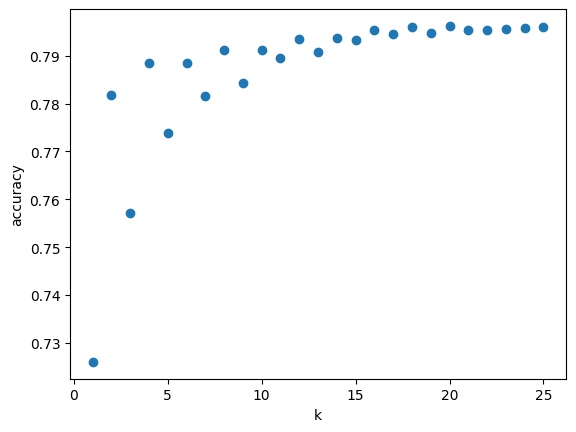

In [108]:
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_knn, Y_train_knn)
    y_pred_knn = knn.predict(X_test_knn)
    scores.append(accuracy_score(Y_test_knn, y_pred_knn))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25])
plt.show()